# Football player Dataset Cleaning and Preparing

This dataset has been downloaded from  Kaggle https://www.kaggle.com/karangadiya/fifa19. License: [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
INPUT_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/datasets/Fifa/FootballPlayerRawDataset.csv"
ATT_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/datasets/Fifa/FootballPlayerPreparedCleanAttributes.csv"
ONE_HOT_ENCODED_CLASSES_FILE_NAME = "/gdrive/My Drive/Colab Notebooks/datasets/Fifa/FootballPlayerOneHotEncodedClasses.csv"

In [ ]:
dataset = pd.read_csv(INPUT_FILE_NAME, sep=",")
dataset['Value']


0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 18207, dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

**First step:** Remove unnecesary columns

In [ ]:
dataset.drop(dataset.loc[:, 'Unnamed: 0':'Name'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Photo':'Flag'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Potential':'Club Logo'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Wage':'Real Face'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Jersey Number':'RB'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'GKDiving':'Release Clause'].columns, inplace=True, axis = 1)

Then, we remove the goal keepers.

In [ ]:
dataset.drop(dataset[dataset.Position=='GK'].index, inplace=True)


In [ ]:
dataset[:10]

,Age,Overall,Value,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,31,94,€110.5M,RF,84.0,95.0,70.0,90.0,86.0,97.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,33,94,€77M,ST,84.0,94.0,89.0,81.0,87.0,88.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,26,92,€118.5M,LW,79.0,87.0,62.0,84.0,84.0,96.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,27,91,€102M,RCM,93.0,82.0,55.0,92.0,82.0,86.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,27,91,€93M,LF,81.0,84.0,61.0,89.0,80.0,95.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,32,91,€67M,RCM,86.0,72.0,55.0,93.0,76.0,90.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,31,91,€80M,RS,77.0,93.0,77.0,82.0,88.0,87.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,32,91,€51M,RCB,66.0,60.0,91.0,78.0,66.0,63.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,29,90,€77M,ST,62.0,91.0,85.0,83.0,89.0,85.0,...,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0
11,28,90,€76.5M,LCM,88.0,76.0,54.0,92.0,82.0,81.0,...,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0


In [ ]:
dataset[-10:]

,Age,Overall,Value,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
18196,19,47,€60K,CM,31.0,28.0,40.0,53.0,31.0,46.0,...,30.0,55.0,44.0,28.0,51.0,44.0,35.0,41.0,44.0,54.0
18197,18,47,€60K,CM,44.0,44.0,36.0,53.0,43.0,50.0,...,37.0,37.0,28.0,39.0,48.0,49.0,52.0,41.0,47.0,38.0
18199,18,47,€70K,CM,31.0,31.0,41.0,51.0,26.0,46.0,...,30.0,53.0,49.0,35.0,40.0,36.0,40.0,48.0,49.0,49.0
18200,18,47,€60K,ST,28.0,47.0,47.0,42.0,37.0,39.0,...,51.0,26.0,16.0,46.0,37.0,58.0,50.0,15.0,17.0,14.0
18201,18,47,€60K,RB,22.0,23.0,45.0,25.0,27.0,21.0,...,16.0,44.0,45.0,20.0,31.0,38.0,43.0,44.0,47.0,53.0
18202,19,47,€60K,CM,34.0,38.0,40.0,49.0,25.0,42.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,19,47,€60K,ST,23.0,52.0,52.0,43.0,36.0,39.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,16,47,€60K,ST,25.0,40.0,46.0,38.0,38.0,45.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,17,47,€60K,RW,44.0,50.0,39.0,42.0,40.0,51.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0
18206,16,46,€60K,CM,41.0,34.0,46.0,48.0,30.0,43.0,...,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0


**Second Step:** find out whether or not there are missing values and remove the least influential attributes.

In [ ]:
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Age': 0,
 'Overall': 0,
 'Value': 0,
 'Position': 60,
 'Crossing': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'ShortPassing': 48,
 'Volleys': 48,
 'Dribbling': 48,
 'Curve': 48,
 'FKAccuracy': 48,
 'LongPassing': 48,
 'BallControl': 48,
 'Acceleration': 48,
 'SprintSpeed': 48,
 'Agility': 48,
 'Reactions': 48,
 'Balance': 48,
 'ShotPower': 48,
 'Jumping': 48,
 'Stamina': 48,
 'Strength': 48,
 'LongShots': 48,
 'Aggression': 48,
 'Interceptions': 48,
 'Positioning': 48,
 'Vision': 48,
 'Penalties': 48,
 'Composure': 48,
 'Marking': 48,
 'StandingTackle': 48,
 'SlidingTackle': 48}

Since we have enough data, we remove all rows with missing values in any attribute

In [ ]:
dataset.dropna (inplace=True)
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Age': 0,
 'Overall': 0,
 'Value': 0,
 'Position': 0,
 'Crossing': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'ShortPassing': 0,
 'Volleys': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FKAccuracy': 0,
 'LongPassing': 0,
 'BallControl': 0,
 'Acceleration': 0,
 'SprintSpeed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'ShotPower': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'LongShots': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positioning': 0,
 'Vision': 0,
 'Penalties': 0,
 'Composure': 0,
 'Marking': 0,
 'StandingTackle': 0,
 'SlidingTackle': 0}

In [ ]:
dataset.shape

(16122, 33)

In [ ]:
def position_grouping(position):
  if position in ['RF', 'ST', 'LF', 'RS', 'RW', 'LS', 'LW', 'CF']:
    return 'fwd'
  elif position in ['RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM']:
    return 'mid'
  elif position in ['RCB', 'CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB']: return 'def'

dataset['Position_group'] = dataset.Position.apply(position_grouping)
dataset.head()
dataset["Position_group"].value_counts()

mid    6838
def    5866
fwd    3418
Name: Position_group, dtype: int64

The **correlation matrix** permits to visualize dependencies between pairs of attributes: values close to -1 or +1 indicate a high correlation. A negative correlation value means than when the value of an attribute gets high, the value of the other attribute decreases, and vice-versa. Positive correlation values point out that both features increase or decrease simultaneously.

<ipython-input-110-9c4b5463eed4>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


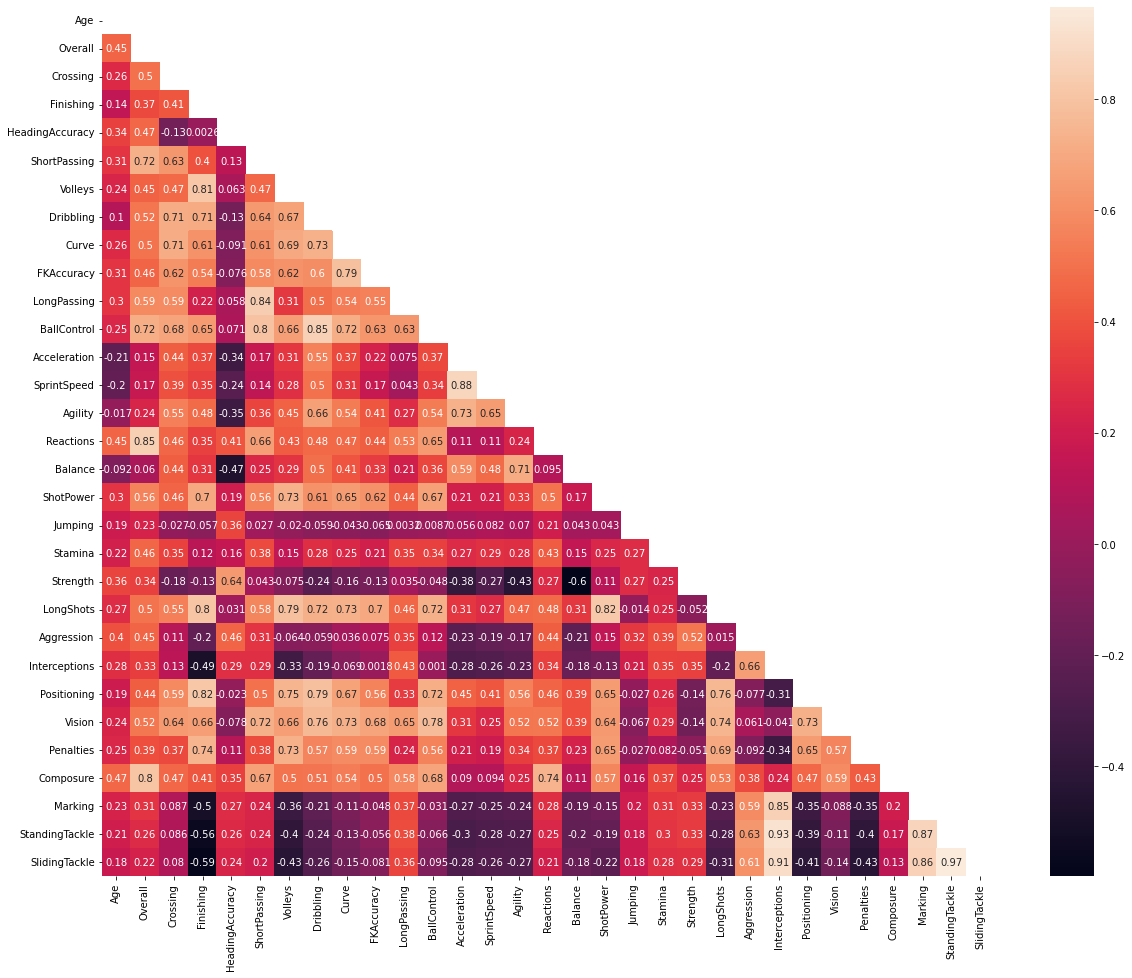

In [ ]:
import seaborn as sns

plt.figure(figsize=(20, 16))
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,mask=mask,annot=True);

In [ ]:
dataset[:10]

,Age,Overall,Value,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Position_group
0,31,94,€110.5M,RF,84.0,95.0,70.0,90.0,86.0,97.0,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,fwd
1,33,94,€77M,ST,84.0,94.0,89.0,81.0,87.0,88.0,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,fwd
2,26,92,€118.5M,LW,79.0,87.0,62.0,84.0,84.0,96.0,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,fwd
4,27,91,€102M,RCM,93.0,82.0,55.0,92.0,82.0,86.0,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,mid
5,27,91,€93M,LF,81.0,84.0,61.0,89.0,80.0,95.0,...,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,fwd
6,32,91,€67M,RCM,86.0,72.0,55.0,93.0,76.0,90.0,...,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,mid
7,31,91,€80M,RS,77.0,93.0,77.0,82.0,88.0,87.0,...,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,fwd
8,32,91,€51M,RCB,66.0,60.0,91.0,78.0,66.0,63.0,...,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,def
10,29,90,€77M,ST,62.0,91.0,85.0,83.0,89.0,85.0,...,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,fwd
11,28,90,€76.5M,LCM,88.0,76.0,54.0,92.0,82.0,81.0,...,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,mid


We remove "Position" and those attributes with a correlation value less than 0.4, assuming that they do not excessively influence the overall value.

# Position Analysis

<ipython-input-113-c66b410380dd>:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
<ipython-input-113-c66b410380dd>:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))
<ipython-input-113-c66b410380dd>:35: DeprecationWarning: `np.bool` is a deprecated a

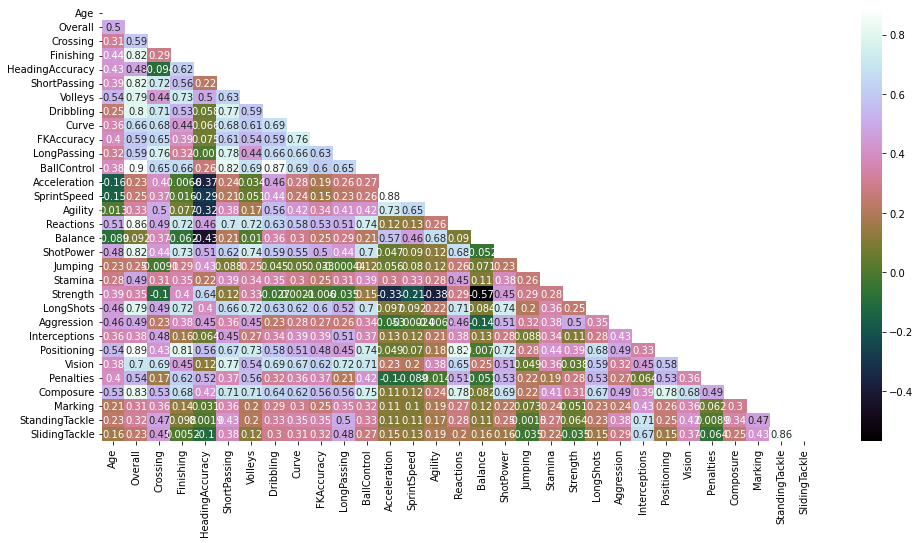

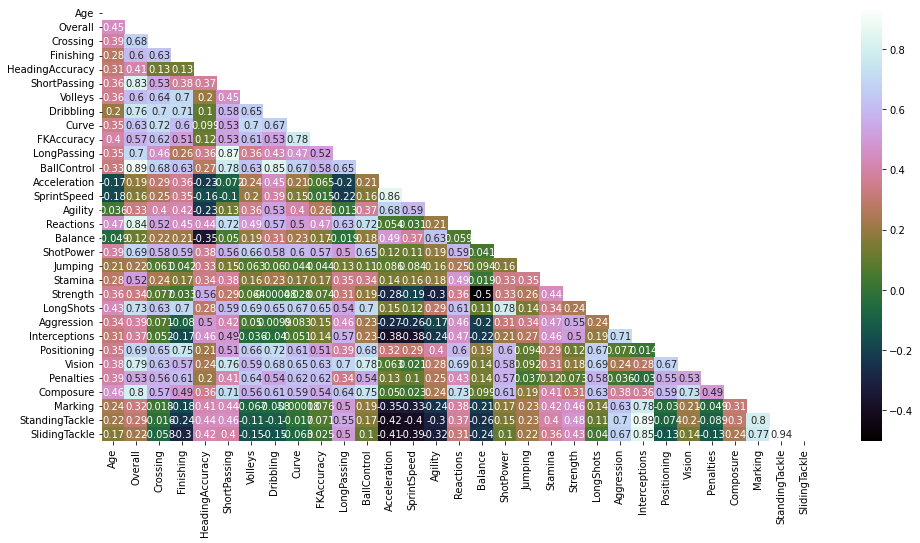

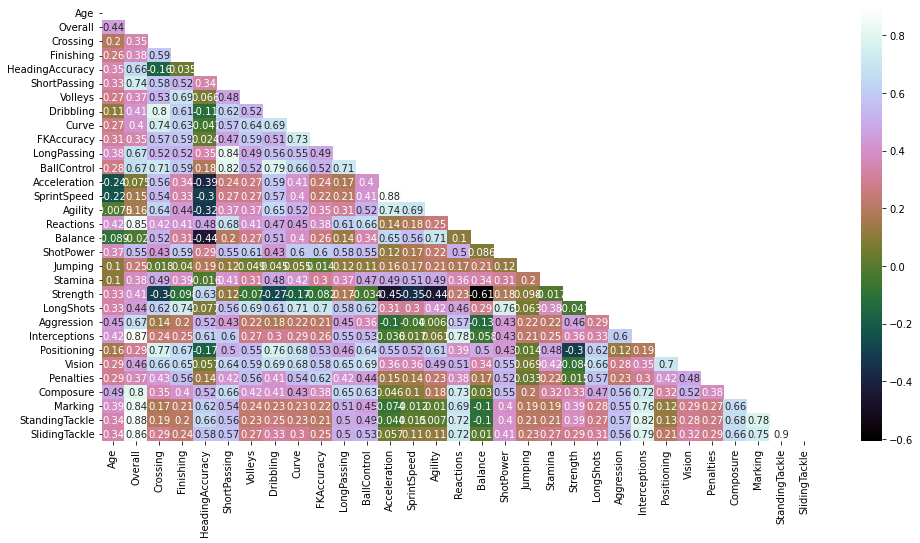

In [ ]:
# # BOX
# # dataset.plot.hist(column=['Overall'],by='Position_group',figsize =(10,8))
# fig=plt.gcf()
# fig.set_size_inches(10,7)
# fig=sns.boxplot(x='Position_group',y='Overall',data=dataset,linewidth=2.5,orient='v',dodge=False)


# # # Histograms
# dataset.hist(column='Overall',by='Position_group',edgecolor='black', linewidth=1.2)
# fig=plt.gcf()
# fig.set_size_inches(12,6)

# fig=plt.gcf()
# fig.set_size_inches(10,7)
#fig=sns.heatmap(dataset.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

dataset_fwd = dataset.loc[dataset['Position_group'] == 'fwd']
fig=plt.figure(1)
fig.set_size_inches(16,8)
corr = dataset_fwd.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig=sns.heatmap(corr,mask=mask,annot=True,cmap='cubehelix')

dataset_mid = dataset.loc[dataset['Position_group'] == 'mid']
fig2=plt.figure(2)
fig2.set_size_inches(16,8)
corr = dataset_mid.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig2=sns.heatmap(corr,mask=mask,annot=True,cmap='cubehelix')

dataset_def = dataset.loc[dataset['Position_group'] == 'def']
fig3=plt.figure(3)
fig3.set_size_inches(16,8)
corr = dataset_def.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig3=sns.heatmap(corr,mask=mask,annot=True,cmap='cubehelix')



In [ ]:
dataset.drop(['Position'], inplace=True, axis = 1)
dataset.drop(['Value'], inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Acceleration':'Agility'].columns, inplace=True, axis = 1)
dataset.drop(['Balance'], inplace=True, axis = 1)
dataset.drop(['Jumping'], inplace=True, axis = 1)
dataset.drop(['Strength'], inplace=True, axis = 1)
dataset.drop(['Interceptions'], inplace=True, axis = 1)
dataset.drop(['Penalties'], inplace=True, axis = 1)
dataset.drop(['Position_group'], inplace=True, axis = 1)


In [ ]:
dataset.shape

(16122, 23)

**Third Step:** shuffle the dataset (three times).

In [ ]:
dataset=dataset.sample(frac=1) #frac is the fraction of axis items to return. 1 means all of them
dataset=dataset.sample(frac=1)
dataset=dataset.sample(frac=1).reset_index(drop=True) #Reset index and drop the old one
dataset.head()

,Age,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle
0,20,69,60.0,60.0,59.0,75.0,55.0,74.0,67.0,49.0,...,64.0,67.0,52.0,55.0,64.0,72.0,74.0,54.0,54.0,60.0
1,30,65,42.0,28.0,66.0,47.0,24.0,47.0,33.0,33.0,...,40.0,74.0,44.0,67.0,34.0,64.0,55.0,60.0,66.0,65.0
2,19,58,53.0,49.0,42.0,55.0,39.0,60.0,42.0,35.0,...,53.0,75.0,35.0,49.0,53.0,53.0,50.0,57.0,50.0,53.0
3,21,66,49.0,59.0,55.0,72.0,40.0,66.0,60.0,60.0,...,52.0,59.0,58.0,44.0,60.0,68.0,61.0,56.0,60.0,53.0
4,19,71,67.0,56.0,64.0,74.0,49.0,69.0,68.0,55.0,...,69.0,69.0,65.0,73.0,51.0,73.0,73.0,62.0,69.0,64.0


**Fourth step:** The problem consists on classifying football players depending on their overall score (quality) into four categories: Poor, Intermediate, Good, and Excellent. We use a quatile-based discretization function to perform this task.  

In [ ]:
labels = pd.qcut(dataset["Overall"],4,labels=False)

In [ ]:
dataset.insert (1,"Quality",labels)
dataset[:10]

,Age,Quality,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle
0,20,2,69,60.0,60.0,59.0,75.0,55.0,74.0,67.0,...,64.0,67.0,52.0,55.0,64.0,72.0,74.0,54.0,54.0,60.0
1,30,1,65,42.0,28.0,66.0,47.0,24.0,47.0,33.0,...,40.0,74.0,44.0,67.0,34.0,64.0,55.0,60.0,66.0,65.0
2,19,0,58,53.0,49.0,42.0,55.0,39.0,60.0,42.0,...,53.0,75.0,35.0,49.0,53.0,53.0,50.0,57.0,50.0,53.0
3,21,1,66,49.0,59.0,55.0,72.0,40.0,66.0,60.0,...,52.0,59.0,58.0,44.0,60.0,68.0,61.0,56.0,60.0,53.0
4,19,2,71,67.0,56.0,64.0,74.0,49.0,69.0,68.0,...,69.0,69.0,65.0,73.0,51.0,73.0,73.0,62.0,69.0,64.0
5,26,1,63,59.0,28.0,57.0,58.0,31.0,51.0,34.0,...,60.0,74.0,40.0,60.0,39.0,41.0,58.0,60.0,63.0,61.0
6,20,2,67,56.0,60.0,51.0,75.0,45.0,72.0,47.0,...,58.0,69.0,52.0,70.0,60.0,60.0,56.0,69.0,55.0,57.0
7,19,0,54,53.0,26.0,45.0,42.0,28.0,50.0,37.0,...,27.0,67.0,27.0,48.0,47.0,34.0,38.0,50.0,54.0,56.0
8,24,1,65,40.0,21.0,68.0,57.0,26.0,38.0,27.0,...,40.0,64.0,22.0,43.0,32.0,50.0,65.0,64.0,67.0,66.0
9,25,2,69,59.0,70.0,59.0,67.0,67.0,68.0,56.0,...,68.0,61.0,63.0,42.0,70.0,54.0,58.0,30.0,22.0,24.0


Calculating the *Overall* intervals for each label.

In [ ]:
intervals={label : [(dataset.loc[dataset["Quality"]==label].min()["Overall"]),
                    (dataset.loc[dataset["Quality"]==label].max()["Overall"])]
                    for label in range(4)}
intervals

{0: [46.0, 62.0], 1: [63.0, 66.0], 2: [67.0, 71.0], 3: [72.0, 94.0]}

The number of instances per label should be balanced.

In [ ]:
dataset["Quality"].value_counts()

2    4353
0    4296
1    3868
3    3605
Name: Quality, dtype: int64

In [ ]:
interval_names = [str(interval) for interval in intervals.values()]
interval_names[0]="Poor:"+interval_names[0]
interval_names[1]="Interm:"+interval_names[1]
interval_names[2]="Good:"+interval_names[2]
interval_names[3]="Excel:"+interval_names[3]
interval_names

['Poor:[46.0, 62.0]',
 'Interm:[63.0, 66.0]',
 'Good:[67.0, 71.0]',
 'Excel:[72.0, 94.0]']

In [ ]:
dataset.drop(columns="Overall", inplace=True)
dataset[:10]


,Age,Quality,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle
0,20,2,60.0,60.0,59.0,75.0,55.0,74.0,67.0,49.0,...,64.0,67.0,52.0,55.0,64.0,72.0,74.0,54.0,54.0,60.0
1,30,1,42.0,28.0,66.0,47.0,24.0,47.0,33.0,33.0,...,40.0,74.0,44.0,67.0,34.0,64.0,55.0,60.0,66.0,65.0
2,19,0,53.0,49.0,42.0,55.0,39.0,60.0,42.0,35.0,...,53.0,75.0,35.0,49.0,53.0,53.0,50.0,57.0,50.0,53.0
3,21,1,49.0,59.0,55.0,72.0,40.0,66.0,60.0,60.0,...,52.0,59.0,58.0,44.0,60.0,68.0,61.0,56.0,60.0,53.0
4,19,2,67.0,56.0,64.0,74.0,49.0,69.0,68.0,55.0,...,69.0,69.0,65.0,73.0,51.0,73.0,73.0,62.0,69.0,64.0
5,26,1,59.0,28.0,57.0,58.0,31.0,51.0,34.0,37.0,...,60.0,74.0,40.0,60.0,39.0,41.0,58.0,60.0,63.0,61.0
6,20,2,56.0,60.0,51.0,75.0,45.0,72.0,47.0,45.0,...,58.0,69.0,52.0,70.0,60.0,60.0,56.0,69.0,55.0,57.0
7,19,0,53.0,26.0,45.0,42.0,28.0,50.0,37.0,29.0,...,27.0,67.0,27.0,48.0,47.0,34.0,38.0,50.0,54.0,56.0
8,24,1,40.0,21.0,68.0,57.0,26.0,38.0,27.0,28.0,...,40.0,64.0,22.0,43.0,32.0,50.0,65.0,64.0,67.0,66.0
9,25,2,59.0,70.0,59.0,67.0,67.0,68.0,56.0,51.0,...,68.0,61.0,63.0,42.0,70.0,54.0,58.0,30.0,22.0,24.0


**Fifth Step:** split the dataset vertically into attributes $x$ and label $t$ for supervised learning.

In [ ]:
discretized_t = pd.DataFrame(data=dataset["Quality"].values,columns=["Quality"])
discretized_t[:10]

,Quality
0,2
1,1
2,0
3,1
4,2
5,1
6,2
7,0
8,1
9,2


In [ ]:
x = dataset.drop (columns="Quality")

x.head()

,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle
0,20,60.0,60.0,59.0,75.0,55.0,74.0,67.0,49.0,72.0,...,64.0,67.0,52.0,55.0,64.0,72.0,74.0,54.0,54.0,60.0
1,30,42.0,28.0,66.0,47.0,24.0,47.0,33.0,33.0,34.0,...,40.0,74.0,44.0,67.0,34.0,64.0,55.0,60.0,66.0,65.0
2,19,53.0,49.0,42.0,55.0,39.0,60.0,42.0,35.0,47.0,...,53.0,75.0,35.0,49.0,53.0,53.0,50.0,57.0,50.0,53.0
3,21,49.0,59.0,55.0,72.0,40.0,66.0,60.0,60.0,66.0,...,52.0,59.0,58.0,44.0,60.0,68.0,61.0,56.0,60.0,53.0
4,19,67.0,56.0,64.0,74.0,49.0,69.0,68.0,55.0,75.0,...,69.0,69.0,65.0,73.0,51.0,73.0,73.0,62.0,69.0,64.0


**Sixth Step:** one-hot encoding of labels (target values).

In [ ]:
encoder = OneHotEncoder(categories="auto") # Function that one-hot encoders integers
one_hot_t = encoder.fit_transform(discretized_t.values.reshape(-1,1)).toarray()
one_hot_t[:10]

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [ ]:
one_hot_t = pd.DataFrame(data=one_hot_t,columns=interval_names)
one_hot_t[:10]


,"Poor:[46.0, 62.0]","Interm:[63.0, 66.0]","Good:[67.0, 71.0]","Excel:[72.0, 94.0]"
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0
9,0.0,0.0,1.0,0.0


**Seventh Step:** Standardization or Normalization of the input dataset. *Standardization* is much less affected by outliers, but it does not bound values to a specific range, which may be a problem for neural networks. The center is the mean, and the data is scaled to unit variance. On the other hand, *max-min scaling* ranges the data within max and min values, usually -1, and 1 or \[0,1\].  

In [ ]:

x = pd.DataFrame (minmax_scale (x, feature_range=(-1,1)),columns=x.columns)
#x = pd.DataFrame (scale (x),columns=x.columns)
x[:10]

,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle
0,-0.68,0.195122,0.176471,0.113924,0.506849,0.125,0.445783,0.349398,-0.071429,0.432432,...,0.234568,0.159420,-0.012048,0.024390,0.261905,0.463415,0.405405,0.047619,0.060241,0.234568
1,0.12,-0.243902,-0.576471,0.291139,-0.260274,-0.650,-0.204819,-0.469880,-0.452381,-0.594595,...,-0.358025,0.362319,-0.204819,0.317073,-0.452381,0.268293,-0.108108,0.190476,0.349398,0.358025
2,-0.76,0.024390,-0.082353,-0.316456,-0.041096,-0.275,0.108434,-0.253012,-0.404762,-0.243243,...,-0.037037,0.391304,-0.421687,-0.121951,0.000000,0.000000,-0.243243,0.119048,-0.036145,0.061728
3,-0.60,-0.073171,0.152941,0.012658,0.424658,-0.250,0.253012,0.180723,0.190476,0.270270,...,-0.061728,-0.072464,0.132530,-0.243902,0.166667,0.365854,0.054054,0.095238,0.204819,0.061728
4,-0.76,0.365854,0.082353,0.240506,0.479452,-0.025,0.325301,0.373494,0.071429,0.513514,...,0.358025,0.217391,0.301205,0.463415,-0.047619,0.487805,0.378378,0.238095,0.421687,0.333333
5,-0.20,0.170732,-0.576471,0.063291,0.041096,-0.475,-0.108434,-0.445783,-0.357143,-0.027027,...,0.135802,0.362319,-0.301205,0.146341,-0.333333,-0.292683,-0.027027,0.190476,0.277108,0.259259
6,-0.68,0.097561,0.176471,-0.088608,0.506849,-0.125,0.397590,-0.132530,-0.166667,0.270270,...,0.086420,0.217391,-0.012048,0.390244,0.166667,0.170732,-0.081081,0.404762,0.084337,0.160494
7,-0.76,0.024390,-0.623529,-0.240506,-0.397260,-0.550,-0.132530,-0.373494,-0.547619,-0.756757,...,-0.679012,0.159420,-0.614458,-0.146341,-0.142857,-0.463415,-0.567568,-0.047619,0.060241,0.135802
8,-0.36,-0.292683,-0.741176,0.341772,0.013699,-0.600,-0.421687,-0.614458,-0.571429,0.081081,...,-0.358025,0.072464,-0.734940,-0.268293,-0.500000,-0.073171,0.162162,0.285714,0.373494,0.382716
9,-0.28,0.170732,0.411765,0.113924,0.287671,0.425,0.301205,0.084337,-0.023810,-0.351351,...,0.333333,-0.014493,0.253012,-0.292683,0.404762,0.024390,-0.027027,-0.523810,-0.710843,-0.654321


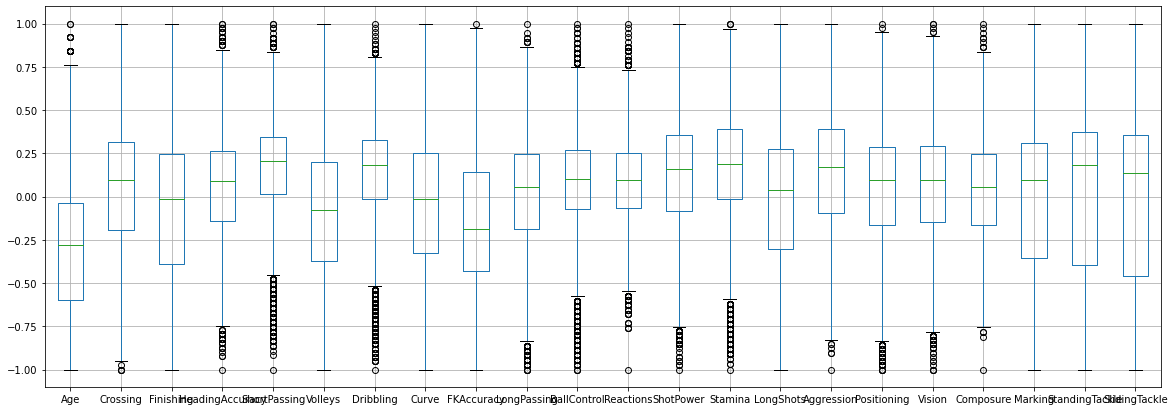

In [ ]:
x.boxplot(figsize=(20,7))

An example of representing just one attribute

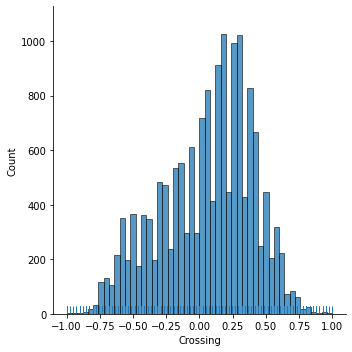

In [ ]:
sns.displot(x["Crossing"],kde=False,rug=True)

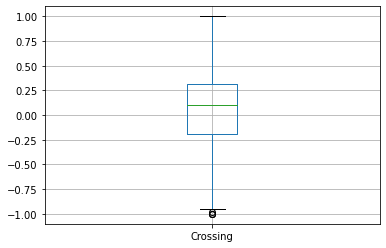

In [ ]:
x.boxplot(column=["Crossing"])

In [ ]:
x.describe()

,Age,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,ShotPower,Stamina,LongShots,Aggression,Positioning,Vision,Composure,Marking,StandingTackle,SlidingTackle
count,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,...,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000
mean,-0.279578,0.053537,-0.064418,0.064942,0.168294,-0.081373,0.122654,-0.030012,-0.132537,0.002751,...,0.125965,0.169170,-0.025506,0.136145,0.043417,0.060219,0.036497,-0.016356,0.010054,-0.021365
std,0.363768,0.344606,0.385352,0.293820,0.268085,0.369549,0.301492,0.364944,0.358826,0.334822,...,0.326638,0.324097,0.379027,0.352347,0.349409,0.314939,0.274291,0.409949,0.461961,0.473324
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.600000,-0.195122,-0.388235,-0.139241,0.013699,-0.375000,-0.012048,-0.325301,-0.428571,-0.189189,...,-0.086420,-0.014493,-0.301205,-0.097561,-0.166667,-0.146341,-0.162162,-0.357143,-0.397590,-0.456790
50%,-0.280000,0.097561,-0.011765,0.088608,0.205479,-0.075000,0.180723,-0.012048,-0.190476,0.054054,...,0.160494,0.188406,0.036145,0.170732,0.095238,0.097561,0.054054,0.095238,0.180723,0.135802
75%,-0.040000,0.317073,0.247059,0.265823,0.342466,0.200000,0.325301,0.253012,0.142857,0.243243,...,0.358025,0.391304,0.277108,0.390244,0.285714,0.292683,0.243243,0.309524,0.373494,0.358025
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Saving** attributes matrix *x* and target labels *t*  to csv files.

In [ ]:
x.to_csv (ATT_FILE_NAME, index=False)
one_hot_t.to_csv(ONE_HOT_ENCODED_CLASSES_FILE_NAME, index=False)